**21-03-29 자연어처리 04_RNN (c)cherryuki (ji)**

# ch04. RNN(순환 신경망)
## 1. 문맥을 이용하여 모델 만들기

In [1]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다
"""

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]
print(encoded)
print(t.word_index)

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [3]:
t.texts_to_sequences(['있다'])[0]

[5]

In [4]:
t.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])[0]

[2, 3, 1, 4, 5]

In [5]:
sequences = []
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    print('원래 문장:', line)
    print('encoded 문장:', encoded)
    for i in range(0, len(encoded)-1):
        for j in range(i+2, len(encoded)+1):
            sequences.append(encoded[i:j])
#제대로 encode되었는지 확인
print()
for sequence in sequences:
    print('[', end=' ')
    for word_seq in sequence:
        for key, value in t.word_index.items():
            if value==word_seq:
                print("{}:{}".format(value, key), end=' ')
    print(']')

원래 문장: 경마장에 있는 말이 뛰고 있다
encoded 문장: [2, 3, 1, 4, 5]
원래 문장: 그의 말이 법이다
encoded 문장: [6, 1, 7]
원래 문장: 가는 말이 고와야 오는 말이 곱다
encoded 문장: [8, 1, 9, 10, 1, 11]
원래 문장: 
encoded 문장: []

[ 2:경마장에 3:있는 ]
[ 2:경마장에 3:있는 1:말이 ]
[ 2:경마장에 3:있는 1:말이 4:뛰고 ]
[ 2:경마장에 3:있는 1:말이 4:뛰고 5:있다 ]
[ 3:있는 1:말이 ]
[ 3:있는 1:말이 4:뛰고 ]
[ 3:있는 1:말이 4:뛰고 5:있다 ]
[ 1:말이 4:뛰고 ]
[ 1:말이 4:뛰고 5:있다 ]
[ 4:뛰고 5:있다 ]
[ 6:그의 1:말이 ]
[ 6:그의 1:말이 7:법이다 ]
[ 1:말이 7:법이다 ]
[ 8:가는 1:말이 ]
[ 8:가는 1:말이 9:고와야 ]
[ 8:가는 1:말이 9:고와야 10:오는 ]
[ 8:가는 1:말이 9:고와야 10:오는 1:말이 ]
[ 8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[ 1:말이 9:고와야 ]
[ 1:말이 9:고와야 10:오는 ]
[ 1:말이 9:고와야 10:오는 1:말이 ]
[ 1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[ 9:고와야 10:오는 ]
[ 9:고와야 10:오는 1:말이 ]
[ 9:고와야 10:오는 1:말이 11:곱다 ]
[ 10:오는 1:말이 ]
[ 10:오는 1:말이 11:곱다 ]
[ 1:말이 11:곱다 ]


In [7]:
print([len(s) for s in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [8]:
#sequences에 가장 많은 단어가 들어 있는 개수
maxlen = max([len(s) for s in sequences])
maxlen

6

In [9]:
type(sequences), len(sequences)

(list, 28)

In [11]:
#sequences를 훈련가능한 데이터로 만들기
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences=sequences, maxlen=maxlen,
                         padding='pre') #앞에 0을 붙임
type(sequences), len(sequences)

(numpy.ndarray, 28)

In [12]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  3,  1,  4],
       [ 0,  0,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  1,  4],
       [ 0,  0,  0,  1,  4,  5],
       [ 0,  0,  0,  0,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11],
       [ 0,  0,  0,  0,  1,  9],
       [ 0,  0,  0,  1,  9, 10],
       [ 0,  0,  1,  9, 10,  1],
       [ 0,  1,  9, 10,  1, 11],
       [ 0,  0,  0,  0,  9, 10],
       [ 0,  0,  0,  9, 10,  1],
       [ 0,  0,  9, 10,  1, 11],
       [ 0,  0,  0,  0, 10,  1],
       [ 0,  0,  0, 10,  1, 11],
       [ 0,  0,  0,  0,  1, 11]])

In [13]:
#독립변수(X)와 종속변수(Y) 분리
X = sequences[:, :-1]
Y = sequences[:, -1]
Y

array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
       11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11])

In [14]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [15]:
vocab_size=len(t.word_index)+1
vocab_size

12

In [16]:
#종속변수(Y)를 원핫 인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, num_classes = vocab_size)
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [17]:
X.shape, Y.shape, vocab_size

((28, 5), (28, 12), 12)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

#RNN 모델 생성
model = Sequential()
#희소행렬로 변환(10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))

#모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

#모델 학습 시키기
hist = model.fit(X, Y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 2.4877 - accuracy: 0.0357
Epoch 2/200
1/1 - 0s - loss: 2.4759 - accuracy: 0.0714
Epoch 3/200
1/1 - 0s - loss: 2.4641 - accuracy: 0.1786
Epoch 4/200
1/1 - 0s - loss: 2.4524 - accuracy: 0.1786
Epoch 5/200
1/1 - 0s - loss: 2.4406 - accuracy: 0.1429
Epoch 6/200
1/1 - 0s - loss: 2.4286 - accuracy: 0.1429
Epoch 7/200
1/1 - 0s - loss: 2.4164 - accuracy: 0.1071
Epoch 8/200
1/1 - 0s - loss: 2.4039 - accuracy: 0.1429
Epoch 9/200
1/1 - 0s - loss: 2.3910 - accuracy: 0.1429
Epoch 10/200
1/1 - 0s - loss: 2.3776 - accuracy: 0.1786
Epoch 11/200
1/1 - 0s - loss: 2.3637 - accuracy: 0.2143
Epoch 12/200
1/1 - 0s - loss: 2.3492 - accuracy: 0.2143
Epoch 13/200
1/1 - 0s - loss: 2.3340 - accuracy: 0.2857
Epoch 14/200
1/1 - 0s - loss: 2.3181 - accuracy: 0.2857
Epoch 15/200
1/1 - 0s - loss: 2.3016 - accuracy: 0.2857
Epoch 16/200
1/1 - 0s - loss: 2.2843 - accuracy: 0.3214
Epoch 17/200
1/1 - 0s - loss: 2.2664 - accuracy: 0.3214
Epoch 18/200
1/1 - 0s - loss: 2.2478 - accuracy: 0.3214
E

Epoch 147/200
1/1 - 0s - loss: 0.7319 - accuracy: 0.7500
Epoch 148/200
1/1 - 0s - loss: 0.7260 - accuracy: 0.7500
Epoch 149/200
1/1 - 0s - loss: 0.7201 - accuracy: 0.7500
Epoch 150/200
1/1 - 0s - loss: 0.7142 - accuracy: 0.7500
Epoch 151/200
1/1 - 0s - loss: 0.7085 - accuracy: 0.7857
Epoch 152/200
1/1 - 0s - loss: 0.7028 - accuracy: 0.7857
Epoch 153/200
1/1 - 0s - loss: 0.6972 - accuracy: 0.8214
Epoch 154/200
1/1 - 0s - loss: 0.6916 - accuracy: 0.8214
Epoch 155/200
1/1 - 0s - loss: 0.6861 - accuracy: 0.8214
Epoch 156/200
1/1 - 0s - loss: 0.6807 - accuracy: 0.8214
Epoch 157/200
1/1 - 0s - loss: 0.6753 - accuracy: 0.8214
Epoch 158/200
1/1 - 0s - loss: 0.6700 - accuracy: 0.8214
Epoch 159/200
1/1 - 0s - loss: 0.6648 - accuracy: 0.8214
Epoch 160/200
1/1 - 0s - loss: 0.6596 - accuracy: 0.8214
Epoch 161/200
1/1 - 0s - loss: 0.6545 - accuracy: 0.8214
Epoch 162/200
1/1 - 0s - loss: 0.6494 - accuracy: 0.8214
Epoch 163/200
1/1 - 0s - loss: 0.6444 - accuracy: 0.8214
Epoch 164/200
1/1 - 0s - loss: 

In [19]:
#모델 평가
model.evaluate(X, Y)

1/1 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.8571


[0.48767781257629395, 0.8571428656578064]

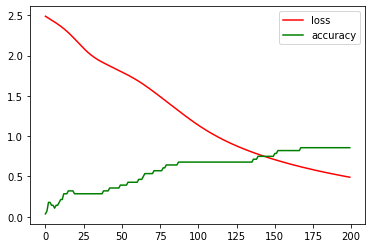

In [20]:
#학습과정 보기
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='r', label='loss')
plt.plot(hist.history['accuracy'], color='g', label='accuracy')
plt.legend()

In [24]:
#'경마장에' 뒤에 나오는 단어를 model에 의해 추측
encoded = t.texts_to_sequences(['경마장에'])[0]
encoded = pad_sequences([encoded], maxlen=maxlen-1, padding='pre')
result = model.predict_classes(encoded)
print('예측 결과:', result[0])
for key, value in t.word_index.items():
    if result[0]==value:
        print('예측 단어:', key)
        break;

예측 결과: 1
예측 단어: 말이


In [26]:
import numpy as np
#사용자에게 입력받은 단어 다음 말 추측하기
word = input('입력단어: ')
encoded = t.texts_to_sequences([word])[0]
encoded = pad_sequences([encoded], maxlen=maxlen-1, padding='pre')
result = np.argmax(model.predict(encoded))
print('예측 결과:', result)
for key, value in t.word_index.items():
    if result==value:
        print('예측 단어:', key)
        break;

입력단어: 가는 말이
예측 결과: 9
예측 단어: 고와야


## 2. 다음 문맥 예측하기

In [29]:
#'가는' 이후에 올 단어 5개 예측 => 가는 말이 고와야 오는 말이 곱다
# ----                 ---
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    print("입력 단어 :", init_word)
    for i in range(1,n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=maxlen-1, padding='pre')
        result = np.argmax(model.predict(encoded))
        for word, index in t.word_index.items():
            if index==result:
                print("{}번째 : {}:{}".format(i, word, result))
                current_word = current_word + ' ' + word
                break;
    return current_word

In [31]:
sentence_generation(model, t, '경마장에 있는', 3)

입력 단어 : 경마장에 있는
1번째 : 말이:1
2번째 : 뛰고:4
3번째 : 있다:5


'경마장에 있는 말이 뛰고 있다'

In [32]:
sentence_generation(model, t, '가는', 5)

입력 단어 : 가는
1번째 : 말이:1
2번째 : 고와야:9
3번째 : 오는:10
4번째 : 말이:1
5번째 : 곱다:11


'가는 말이 고와야 오는 말이 곱다'

## 3. LSTM

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

#모델 생성
model = Sequential()
#희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(LSTM(32))
model.add(Dense(vocab_size, activation="softmax"))

#모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=250, verbose=2)

Epoch 1/250
1/1 - 0s - loss: 2.4848 - accuracy: 0.0714
Epoch 2/250
1/1 - 0s - loss: 2.4821 - accuracy: 0.1786
Epoch 3/250
1/1 - 0s - loss: 2.4793 - accuracy: 0.2857
Epoch 4/250
1/1 - 0s - loss: 2.4766 - accuracy: 0.2857
Epoch 5/250
1/1 - 0s - loss: 2.4738 - accuracy: 0.2857
Epoch 6/250
1/1 - 0s - loss: 2.4710 - accuracy: 0.2857
Epoch 7/250
1/1 - 0s - loss: 2.4682 - accuracy: 0.2857
Epoch 8/250
1/1 - 0s - loss: 2.4653 - accuracy: 0.2857
Epoch 9/250
1/1 - 0s - loss: 2.4623 - accuracy: 0.2857
Epoch 10/250
1/1 - 0s - loss: 2.4592 - accuracy: 0.2857
Epoch 11/250
1/1 - 0s - loss: 2.4560 - accuracy: 0.2857
Epoch 12/250
1/1 - 0s - loss: 2.4527 - accuracy: 0.2857
Epoch 13/250
1/1 - 0s - loss: 2.4493 - accuracy: 0.2857
Epoch 14/250
1/1 - 0s - loss: 2.4457 - accuracy: 0.2857
Epoch 15/250
1/1 - 0s - loss: 2.4420 - accuracy: 0.2857
Epoch 16/250
1/1 - 0s - loss: 2.4381 - accuracy: 0.2857
Epoch 17/250
1/1 - 0s - loss: 2.4340 - accuracy: 0.2857
Epoch 18/250
1/1 - 0s - loss: 2.4297 - accuracy: 0.2857
E

Epoch 147/250
1/1 - 0s - loss: 1.4795 - accuracy: 0.5357
Epoch 148/250
1/1 - 0s - loss: 1.4696 - accuracy: 0.5357
Epoch 149/250
1/1 - 0s - loss: 1.4596 - accuracy: 0.5714
Epoch 150/250
1/1 - 0s - loss: 1.4495 - accuracy: 0.5714
Epoch 151/250
1/1 - 0s - loss: 1.4394 - accuracy: 0.5714
Epoch 152/250
1/1 - 0s - loss: 1.4293 - accuracy: 0.5714
Epoch 153/250
1/1 - 0s - loss: 1.4191 - accuracy: 0.5714
Epoch 154/250
1/1 - 0s - loss: 1.4089 - accuracy: 0.5714
Epoch 155/250
1/1 - 0s - loss: 1.3986 - accuracy: 0.5714
Epoch 156/250
1/1 - 0s - loss: 1.3883 - accuracy: 0.5714
Epoch 157/250
1/1 - 0s - loss: 1.3780 - accuracy: 0.5714
Epoch 158/250
1/1 - 0s - loss: 1.3677 - accuracy: 0.5714
Epoch 159/250
1/1 - 0s - loss: 1.3574 - accuracy: 0.5714
Epoch 160/250
1/1 - 0s - loss: 1.3470 - accuracy: 0.5714
Epoch 161/250
1/1 - 0s - loss: 1.3367 - accuracy: 0.5714
Epoch 162/250
1/1 - 0s - loss: 1.3264 - accuracy: 0.5714
Epoch 163/250
1/1 - 0s - loss: 1.3161 - accuracy: 0.5714
Epoch 164/250
1/1 - 0s - loss: 